# Notes: Tiles and murals

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.patches import Polygon
import math
from copy import copy

## Basic definitions

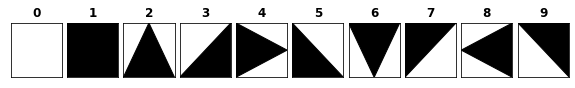

In [2]:
def get_0():
    return Polygon([(0,0)], color="k")

def get_1():
    return Polygon([(0,0), (0,1), (1,1), (1,0)], color="k")

def get_2():
    return Polygon([(0,0), (0.5,1), (1,0)], color="k")

def get_3():
    return Polygon([(0,0), (1,1), (1,0)], color="k")

def get_4():
    return Polygon([(0,0),(1,0.5), (0,1)], color="k")

def get_5():
    return Polygon([(0,0), (0,1), (1,0)], color="k")

def get_6():
    return Polygon([(0,1), (0.5,0), (1,1)], color="k")

def get_7():
    return Polygon([(0,0), (1,1), (0,1)], color="k")

def get_8():
    return Polygon([(0,0.5), (1,1),(1,0)], color="k")

def get_9():
    return Polygon([(1,0), (1,1), (0,1)], color="k")



def num2tile(num):
    if num==0:
        return get_0()
    elif num == 1:
        return get_1()
    elif num == 2:
        return get_2()
    elif num == 3:
        return get_3()
    elif num == 4:
        return get_4()
    elif num == 5:
        return get_5()
    elif num == 6:
        return get_6()
    elif num == 7:
        return get_7()
    elif num == 8:
        return get_8()
    elif num == 9:
        return get_9()
    
    
def float2vector(float_):
    float_str = "{:.10f}".format(float_)
    return [int(x) for x in "".join(re.findall('[0-9]+', float_str))]
    
v = [0,1,2,3,4,5,6,7,8,9]
fig, _ = plt.subplots(1,10, figsize=(10,1))
fig.subplots_adjust(hspace=0.01, wspace=0.10)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('{}'.format(n), fontweight="bold")



## Rotation and convolution

In [3]:
rotate_cw = {0:0, 1:1,
             2:4, 3:5,
             4:6, 5:7,
             6:8, 7:9,
             8:2, 9:3}

rotate_ccw = {0:0, 1:1,
              2:8, 3:9,
              4:2, 5:3,
              6:4, 7:5,
              8:6, 9:7}



def convolution(input_v):
    v = copy(input_v)
    size = len(v)
    for i,_ in enumerate(v):
        if i > 0 and v[i] > 0:
            if v[i-1]%v[i] == 0:
                v[i-1] = rotate_cw[v[i-1]]
            else:
                v[i-1] = rotate_ccw[v[i-1]]
        if i < size-1 and v[i] > 0:
            if v[i+1]%v[i] == 0:
                v[i+1] = rotate_cw[v[i+1]]
            else:
                v[i+1] = rotate_ccw[v[i+1]]
    return v


In [4]:
10*np.pi

31.41592653589793

### Example

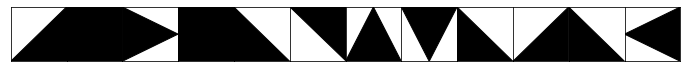

In [5]:
v = [3,1,4, 1, 5, 9, 2, 6, 5, 3, 5, 8]
fig, _ = plt.subplots(1,12, figsize=(12,1))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])

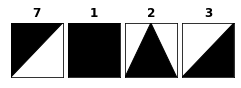

In [6]:
v = [7,1,2,3]
fig, _ = plt.subplots(1,4, figsize=(4,1))
fig.subplots_adjust(hspace=0.00, wspace=0.10)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('{}'.format(n), fontweight="bold")


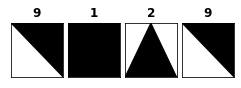

In [7]:
v = convolution(v)
fig, _ = plt.subplots(1,4, figsize=(4,1))
fig.subplots_adjust(hspace=0.00, wspace=0.10)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('{}'.format(n), fontweight="bold")

## Convolution as a function between natural numbers

In [8]:
def int2list(n):
    return [int(i) for i in str(n)]
    

def list2int(v):
    v_str = [str(i) for i in v]
    return int("".join(v_str))

def conv(n):
    return list2int(convolution(int2list(n)))

def get_f(k):
    f = lambda x: conv(x) + k
    return f 

f_0 = get_f(0)
f_0_v = np.vectorize(f_0)

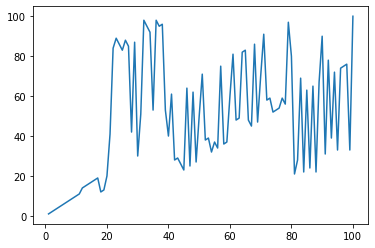

In [9]:
x = np.array(range(1, 100+1))
y = f_0_v(x)
plt.plot(x,y);

## Convolution as a function between real numbers

In [10]:
def c_float(float_):
    p_pos = str(np.abs(float_)).find(".")
    float_str = "{:.10f}".format(float_)
    v = [int(x) for x in "".join(re.findall('[0-9]+', float_str))]
    new_v = convolution(v)
    s = ""
    for i,n in enumerate(new_v):
        if i== p_pos:
            s+= "." + str(n)
        else:
            s += str(n)
    base_float = float(s)
    if float_ >=0:
        return base_float
    else:
        return -1*base_float
    
c_f = np.vectorize(c_float)

In [11]:
c_float(7.123), c_float(71.23)

(9.129, 91.29)

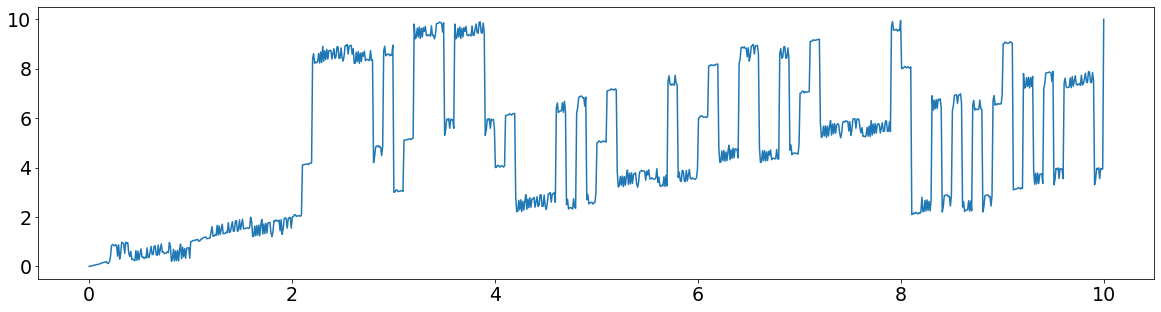

In [12]:
out_path ="img/0_10.png"
figsize=(20, 5)
fontsize_x=20.0
x_ticks_size=19
fontsize_y=20
y_ticks_size=19
linewidth=1

x = np.linspace(0,10,1000)
y = c_f(x)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(x,y);
ax.tick_params(axis="x", labelsize=x_ticks_size);
ax.tick_params(axis="y", labelsize=y_ticks_size, rotation=0);
fig.savefig(out_path, bbox_inches="tight")

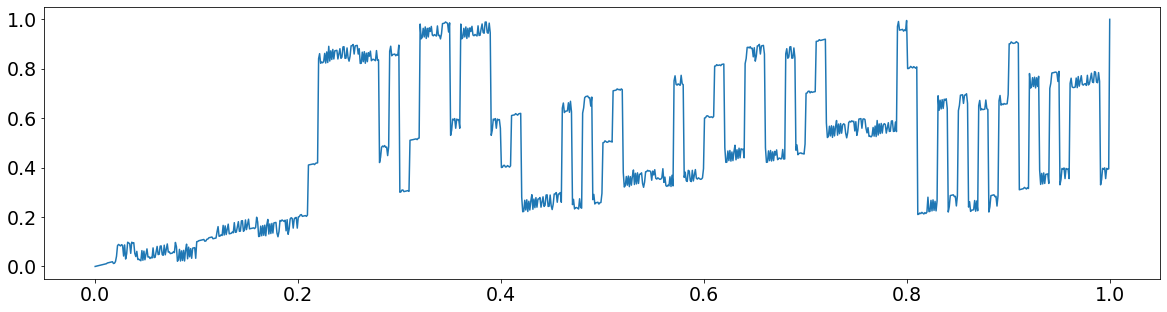

In [13]:
out_path ="img/0_1.png"
figsize=(20, 5)
fontsize_x=20.0
x_ticks_size=19
fontsize_y=20
y_ticks_size=19
linewidth=1

x = np.linspace(0,1.0,1000)
y = c_f(x)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(x,y);
ax.tick_params(axis="x", labelsize=x_ticks_size);
ax.tick_params(axis="y", labelsize=y_ticks_size, rotation=0);
fig.savefig(out_path, bbox_inches="tight")

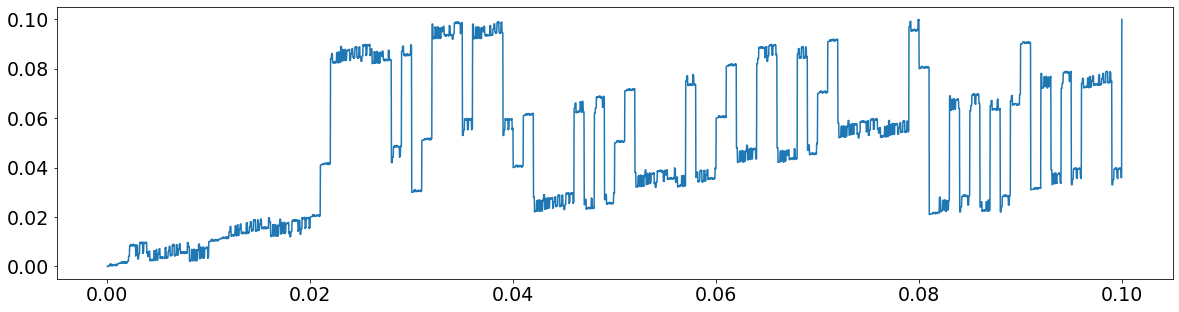

In [14]:
out_path ="img/0_0p1.png"
figsize=(20, 5)
fontsize_x=20.0
x_ticks_size=19
fontsize_y=20
y_ticks_size=19
linewidth=1

x = np.linspace(0,0.1,4000)
y = c_f(x)
fig, ax = plt.subplots(figsize=figsize)
plt.plot(x,y);
ax.tick_params(axis="x", labelsize=x_ticks_size);
ax.tick_params(axis="y", labelsize=y_ticks_size, rotation=0);
fig.savefig(out_path, bbox_inches="tight")

## Example of murals

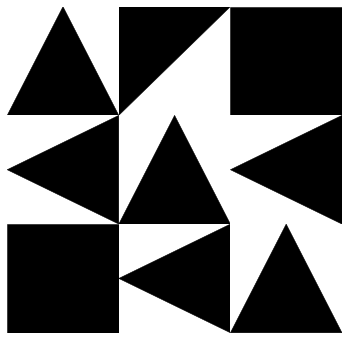

In [15]:
plt.style.use('ggplot')


v = float2vector(math.e)
fig, _ = plt.subplots(3,3, figsize=(6,6))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")
    ax.set_facecolor('white')

In [16]:
phi_10k = "6180339887498948482045868343656381177203091798057628621354486227052604628189024497072072041893911374847540880753868917521266338622235369317931800607667263544333890865959395829056383226613199282902678806752087668925017116962070322210432162695486262963136144381497587012203408058879544547492461856953648644492410443207713449470495658467885098743394422125448770664780915884607499887124007652170575179788341662562494075890697040002812104276217711177780531531714101170466659914669798731761356006708748071013179523689427521948435305678300228785699782977834784587822891109762500302696156170025046433824377648610283831268330372429267526311653392473167111211588186385133162038400522216579128667529465490681131715993432359734949850904094762132229810172610705961164562990981629055520852479035240602017279974717534277759277862561943208275051312181562855122248093947123414517022373580577278616008688382952304592647878017889921990270776903895321968198615143780314997411069260886742962267575605231727775203536139362107673893764556060605921658946675955190040055590895022953094231248235521221241544400647034056573479766397239494994658457887303962309037503399385621024236902513868041457799569812244574717803417312645322041639723213404444948730231541767689375210306873788034417009395440962795589867872320951242689355730970450959568440175551988192180206405290551893494759260073485228210108819464454422231889131929468962200230144377026992300780308526118075451928877050210968424936271359251876077788466583615023891349333312231053392321362431926372891067050339928226526355620902979864247275977256550861548754357482647181414512700060238901620777322449943530889990950168032811219432048196438767586331479857191139781539780747615077221175082694586393204565209896985556781410696837288405874610337810544439094368358358138113116899385557697548414914453415091295407005019477548616307542264172939468036731980586183391832859913039607201445595044977921207612478564591616083705949878600697018940988640076443617093341727091914336501371576601148038143062623805143211734815100559013456101180079050638142152709308588092875703450507808145458819906336129827981411745339273120809289727922213298064294687824274874017450554067787570832373109759151177629784432847479081765180977872684161176325038612112914368343767023503711163307258698832587103363222381098090121101989917684149175123313401527338438372345009347860497929459915822012581045982309255287212413704361491020547185549611808764265765110605458814756044317847985845397312863016254487611485202170644041116607669505977578325703951108782308271064789390211156910392768384538633332156582965977310343603232254574363720412440640888267375843395367959312322134373209957498894699565647360072959998391288103197426312517971414320123112795518947781726914158911779919564812558001845506563295285985910009086218029775637892599916499464281930222935523466747593269516542140210913630181947227078901220872873617073486499981562554728113734798716569527489008144384053274837813782466917444229634914708157007352545707089772675469343822619546861533120953357923801460927351021011919021836067509730895752895774681422954339438549315533963038072916917584610146099505506480367930414723657203986007355076090231731250161320484358364817704848181099160244252327167219018933459637860878752870173935930301335901123710239171265904702634940283076687674363865132710628032317406931733448234356453185058135310854973335075996677871244905836367541328908624063245639535721252426117027802865604323494283730172557440583727826799603173936401328762770124367983114464369476705312724924104716700138247831286565064934341803900410178053395058772458665575522939158239708417729833728231152569260929959422400005606266786743579239724540848176519734362652689448885527202747787473359835367277614075917120513269344837529916499809360246178442675727767900191919070380522046123248239132610432719168451230602362789354543246176997575368904176365025478513824631465833638337602357789926729886321618583959036399818384582764491245980937043055559613797343261348304949496868108953569634828178128862536460842033946538194419457142666823718394918323709085748502665680398974406621053603064002608171126659954199368731609457228881092077882277203636684481532561728411769097926666552238468831137185299192163190520156863122282071559987646842355205928537175780765605036773130975191223973887224682580571597445740484298780735221598426676625780770620194304005425501583125030175340941171910192989038447250332988024501436796844169479595453045910313811621870456799786636617460595700034459701135251813460065655352034788811741499412748264152135567763940390710387088182338068033500380468001748082205910968442026446402187705340100318028816644153091393948156403192822785482414510503188825189970074862287942155895742820216657062188090578088050324676991297287210387073697406435667458920258656573978560859566534107035997832044633634648548949766388535104552729824229069984885369682804645974576265143435905093832124374333387051665714900590710567024887985804371815126100440381488040725244061642902247822715272411208506578883871249363510680636516674322232776775579739927037623191470473239551206070550399208844260370879084333426183841359707816482955371432196118950379771463000755597537957035522714493191321725564401283091805045008992187051211860693357315389593507903007367270233141653204234015537414426871540551164796114332302485440409406911456139873026039518281680344825254326738575900560432024537271929124864581333441698529939135747869895798643949802304711696715736228391201812731291658995275991922031837235682727938563733126547998591246327503006059256745497943508811929505685493259355318729141801136412187470752628106869830135760524719445593219553596104528303148839117693011965858343144248948985655842508341094295027719758335224429125736493807541711373924376014350682987849327129975122868819604983577515877178041069713196675347719479226365190163397712847390793361111914089983056033610609871717830554354035608952929081846414371392943781356048203894791257450770755751030024207266290018090422934249425906066614133228722698069014599451199547801639915141261252572828066433126165746938819510644216738718000110042184830258091654338374923641183888564685143150063731904295148146942431460895254707203740556691306922099080481945297511065046428105417755259095187131888359147659960413179602094153085855332387725380232727632977372143127968216716234421183201802881412747443168847218459392781435474099999072233203059262976611238327983316988253931262006503702884478286669404473079471047612558658375298623625099982323359715507233838332440815257781933642626304330265895817080045127887311593558774721725649470005163667257715392098409503274511215368730091219962952276591316370939686072713426926231547533043799331658110736964314217197943405639155121081081362626888569748068060116918941750272298741586991791453499462444194012197858601373660828690722365147713912687420966513787562059185432888834174292090156313328319357562208971376563097850156315498245644586542479293572282875060848145335135218172958793299117100324762220521946451053624505129884308713444395072442673514628617991832336459836963763272257569159723954383052086647474238151107927349483695239647926899369832491799950278950006045966131346336302494995148080532901790297518251587504900743518798351183603272277260171740453557165885557829729106195819351710554825793070910057635869901929721799516873117556314448564810022001425454055429273458837116020994794572082378043687189448056368918258024449963187834202749101533579107273362532890693347412380222201162627711930854485029541913200400999865566651775664095365619789781838045103035651013158945890287186108690589394713680148457001836649564720329433437429894642741255143590584348409195487015236140317391390361644019845505104912116979200120199960506994966403035086369290394100701945053201623487276323273244943963048089055425137972331475185207091025063685981679530481810073942453170023880475983432345041425843140636127210960228242337822809027976596077710849391517488731687771352239009117117350918600654620099024975852779254278165970383495058010626155333691093784659771052975022317307412177834418941184596586102980187787427445638669661277245038458605264151030408982577775447411533207640758816775149755380471162966777100587664615954967769270549623939857092550702740699781408431249653630718665337180605874224259816530705257383454157705429216299811491750861131176577317209561565647869547448927132060806354577946241453106698374211379816896382353330447788316933972872891810366408326985698825443851667586228993069643468489751484087903964760420361020602171739447026348763365439319522907738361673898117812424836557810503416945156362604300366574310847665487778012857792364541852244723617137422925584159313561286637167032807217155339264632573067306391085410886808574283858828060230334140855039097353872613451196292641599521278931135443146015273090255382710432596622674390374556361228613907831943357059003814870089866131539819585744233044197085669672229314273074138488278897558886079973870447020316683485694199096548029824931981765792682985562972301068277723516274078380743187782731821191969528005160879157212882633796823127256287000150018292975772999357909491964076344286157571354442789838304045470271019458004258202120234458063034503365814721854920367998997293535391968121331951653797453991114942444518303385884129040181781882137600665928494136775431745160540938711036871521164040582193447120448277596054169486453987832626954801391501903899593130670318661670663719640256928671388714663118919268568269199527645799771827875946096161721886810945465157886912241060981419726861925547878992631535947292282508054251690681401078179602188533076230556381631640192245450325765673925997651753080142716071430871886285983603746505713420467008343275423027704779331118366690323288530687387990713590074030490745988951364768760867844323824821893061757031956380323081971936356727419643872625870615433072963703812751517040600505759488272385634515639052657710426459476040556950959840888903762079956638801786185591594411172509231327977113803"
v = [int(x) for x in "".join(phi_10k)]

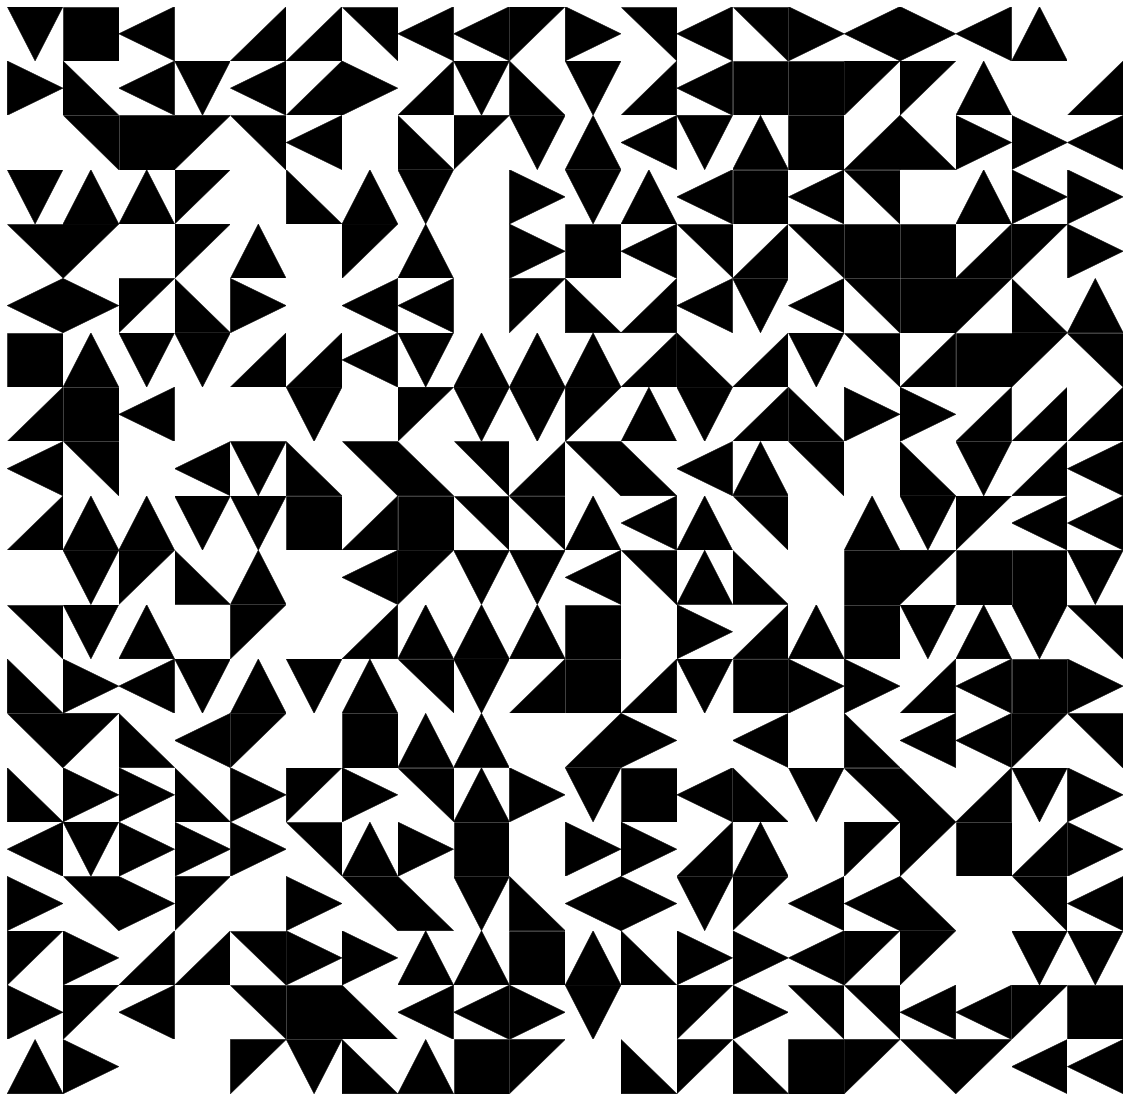

In [17]:
fig, _ = plt.subplots(20,20, figsize=(20,20))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")
    ax.set_facecolor('white')
out_path ="img/mural1.png"
fig.savefig(out_path, bbox_inches="tight", facecolor=fig.get_facecolor(), transparent=False)

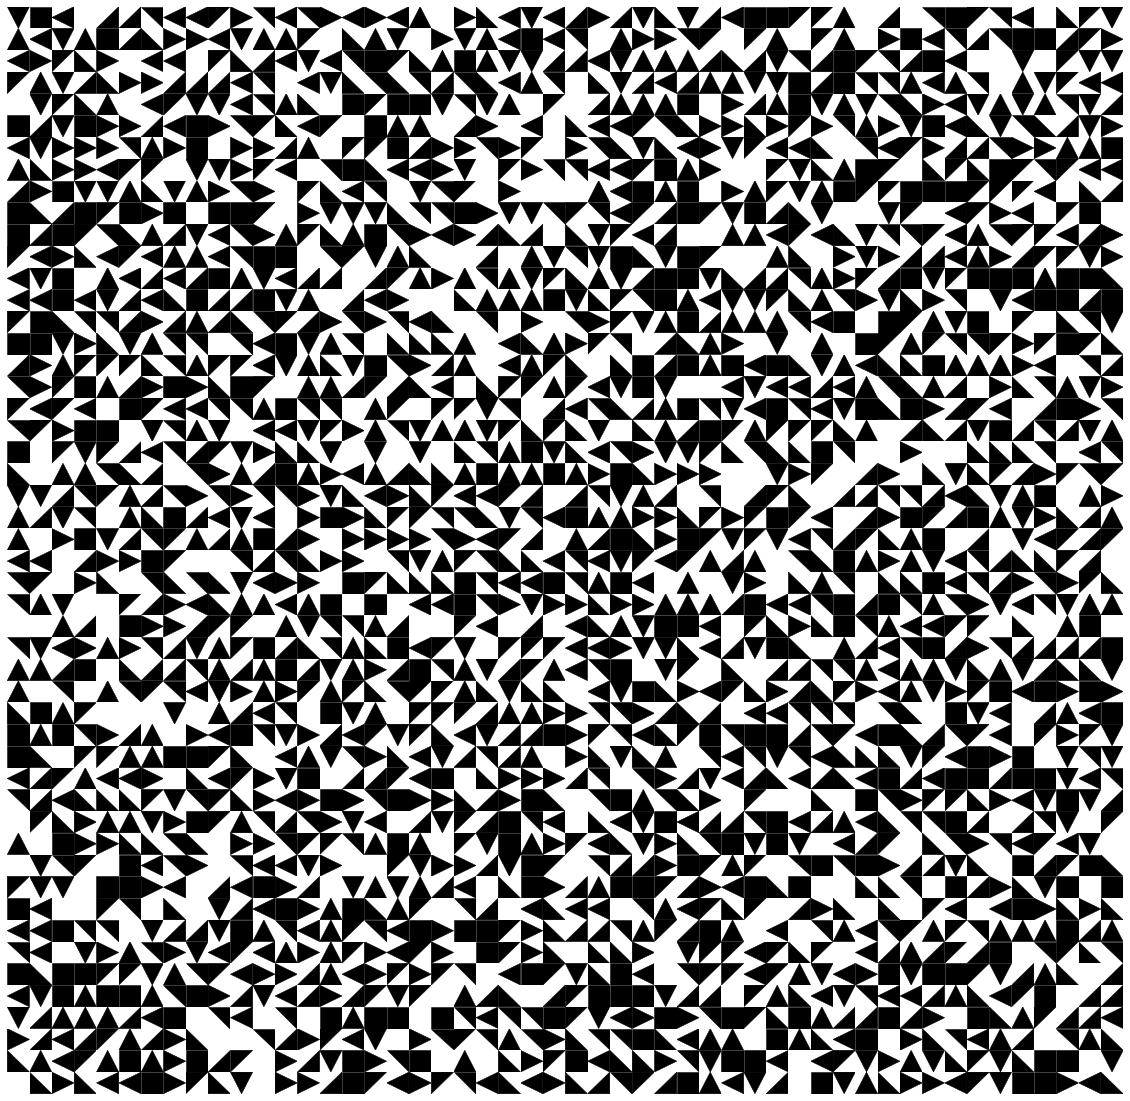

In [18]:
fig, _ = plt.subplots(50,50, figsize=(20,20))
fig.subplots_adjust(hspace=0.00, wspace=0.00)
for n,ax in zip(v, fig.axes):
    ax.add_patch(num2tile(n))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis("off")
    ax.set_facecolor('white')
out_path ="img/mural2.png"
fig.savefig(out_path, bbox_inches="tight", facecolor=fig.get_facecolor(), transparent=False)